In [18]:
from dataclasses import dataclass, field
from typing import List
import json
import mplfinance as mpf
import pandas as pd
from datetime import datetime

@dataclass
class CandleStick:
    """
    Data class to store the details of a candlestick in financial markets.

    Attributes:
    - timestamp (int): System timestamp, Unix millisecond timestamp, e.g. 1690196141868.
    - open_price (float): Opening price.
    - high_price (float): Highest price during the period.
    - low_price (float): Lowest price during the period.
    - close_price (float): Closing price at the end of the period.
    - volume_base (float): Trading volume in base currency, e.g., "BTC" in "BTCUSDT".
    - volume_quote (float): Trading volume in quote currency, e.g., "USDT" in "BTCUSDT".
    - volume_usdt (float): Trading volume in USDT.
    """
    timestamp: int
    open_price: float
    high_price: float
    low_price: float
    close_price: float
    volume_base: float
    volume_quote: float
    volume_usdt: float
        
@dataclass
class CandleStickSeries:
    """
    A collection of CandleStick data points. This class is used to manage a series of CandleStick objects,
    providing utilities for analyzing time series data of market prices and volumes.

    Attributes:
    - candlesticks (List[CandleStick]): List to hold multiple CandleStick objects.
    """
    candlesticks: List[CandleStick] = field(default_factory=list)

    def add_candlestick(self, candlestick: CandleStick):
        """
        Adds a new CandleStick object to the candlesticks list.

        Parameters:
        - candlestick (CandleStick): The CandleStick object to be added.
        """
        self.candlesticks.append(candlestick)
    def load_from_json(self, json_file):
        """
        Loads candlestick data from a JSON file into the candlestick series.
        
        Parameters:
        - filename (str): Path to the JSON file that contains the candlestick data.
        """
        with open(filename, 'r') as file:
            json_data = json.load(file)
        
        for entry in json_data["data"]:
            candlestick = CandleStick(
                timestamp=int(entry[0]),
                open_price=float(entry[1]),
                high_price=float(entry[2]),
                low_price=float(entry[3]),
                close_price=float(entry[4]),
                volume_base=float(entry[5]),
                volume_quote=float(entry[6]),
                volume_usdt=float(entry[7]),)
            self.add_candlestick(candlestick)

    def get_start_timestamp(self) -> int:
        return min([c.timestamp for c in self.candlesticks])
    def get_end_timestamp(self) -> int:
        return min([c.timestamp for c in self.candlesticks])
    
    def plot_candlesticks(self):
        """Generates a candlestick chart using Matplotlib and mplfinance."""
        # Convert CandleStick data to a DataFrame
        df = pd.DataFrame([{
            'Date': datetime.fromtimestamp(candle.timestamp / 1000),
            'Open': candle.open_price,
            'High': candle.high_price,
            'Low': candle.low_price,
            'Close': candle.close_price,
            'Volume': candle.volume_quote  # typically volume is quote volume
        } for candle in self.candlesticks])

        df.set_index('Date', inplace=True)

        # Plotting the data
        mpf.plot(df, type='candle', style='charles',
                 title='Candlestick Chart',
                 ylabel='Price (USD)',
                 ylabel_lower='Volume',
                 volume=True,
                 mav=(3, 6, 9),  # moving averages to show on the plot
                 show_nontrading=True)

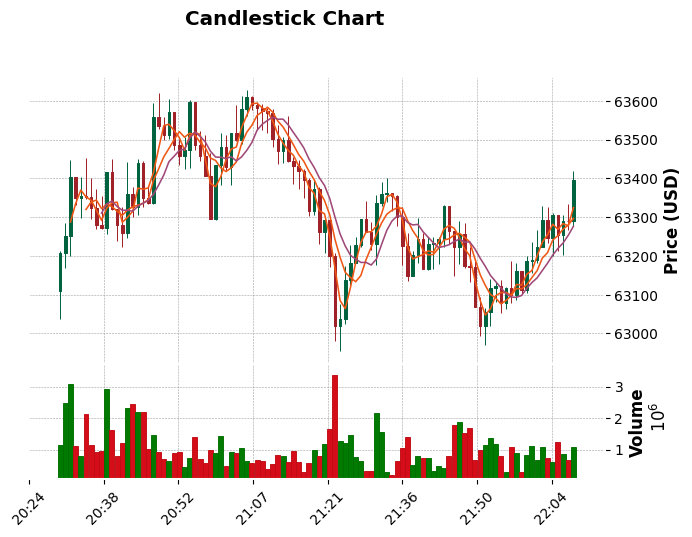

In [19]:
filename = '../bitget/results.json'
series = CandleStickSeries()
series.load_from_json(filename)
series.plot_candlesticks()

In [ ]:
class Strategy:
    def __init__(self, series=None):
        self.series = series
    def quote(self, realtime=False):
            